In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/iris.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='species', ylabel='count'>

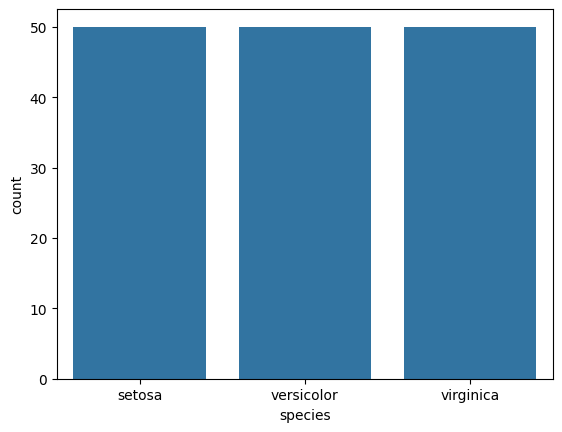

In [6]:
sns.countplot(x='species',data=df)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

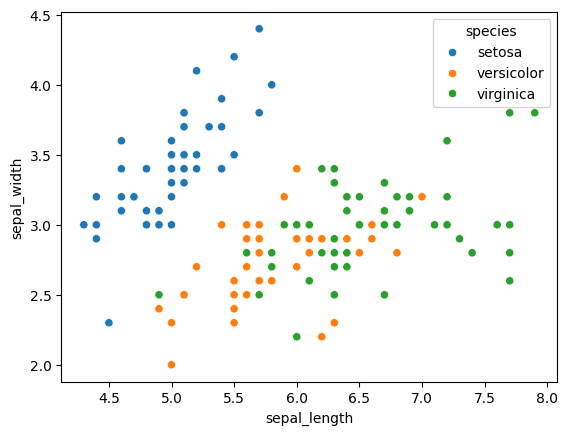

In [7]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='species')

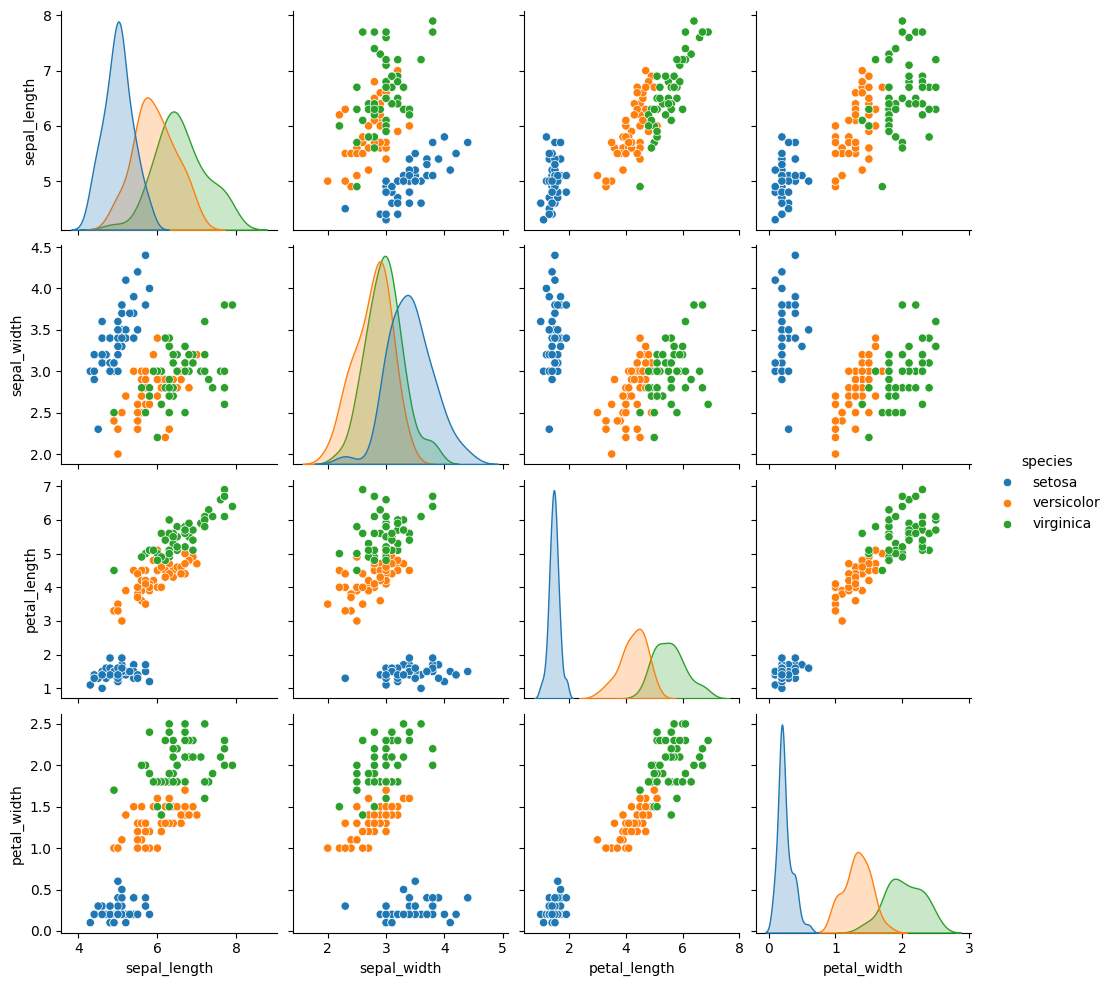

In [8]:
sns.pairplot(data=df,hue='species')

<Axes: >

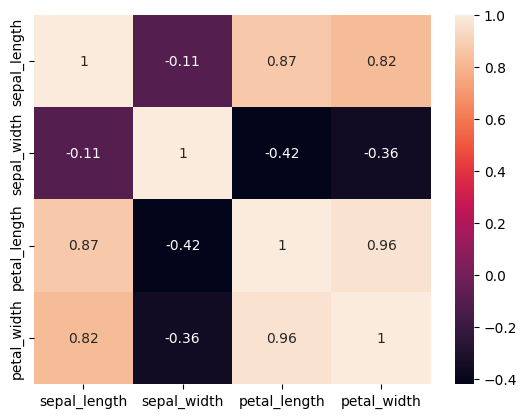

In [10]:
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X= df.drop('species',axis=1)

In [13]:
y = df['species']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [16]:
scaler = StandardScaler()

In [17]:
X_train_t = scaler.fit_transform(X_train)
X_test_t = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
from sklearn.model_selection import GridSearchCV

In [23]:
logmodel = LogisticRegression(solver = 'saga',multi_class = 'ovr',
                              max_iter = 5000)

In [25]:
penalty = ['l1','l2','elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)

param_grid = {'penalty':penalty,
              'l1_ratio':l1_ratio,
              'C':C}

In [26]:
grid_model = GridSearchCV(logmodel,param_grid=param_grid,cv=5,verbose=2)

In [27]:
grid_model.fit(X_train_t,y_train)

Output hidden; open in https://colab.research.google.com to view.

In [28]:
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix, ConfusionMatrixDisplay

In [29]:
grid_model.best_params_

{'C': np.float64(11.28837891684689),
 'l1_ratio': np.float64(0.0),
 'penalty': 'l1'}

In [30]:
y_pred = grid_model.predict(X_test_t)

In [31]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [33]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]])

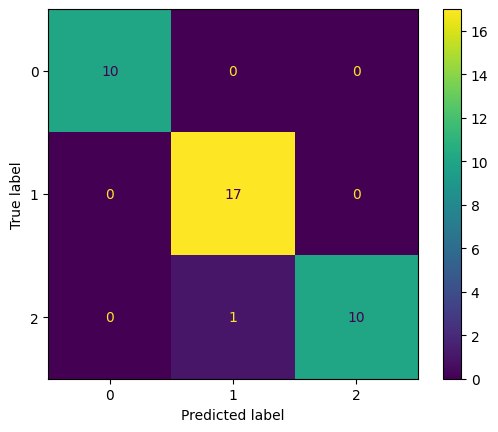

In [34]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [35]:
from sklearn.metrics import roc_curve,roc_auc_score

In [37]:
from sklearn.metrics import RocCurveDisplay

In [ ]:
RocCurveDisplay.from_estimator(grid_model, X_test_t, y_test)
plt.show()

In [43]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = roc_auc_score(y_test_dummies[:, i], y_score[:, i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

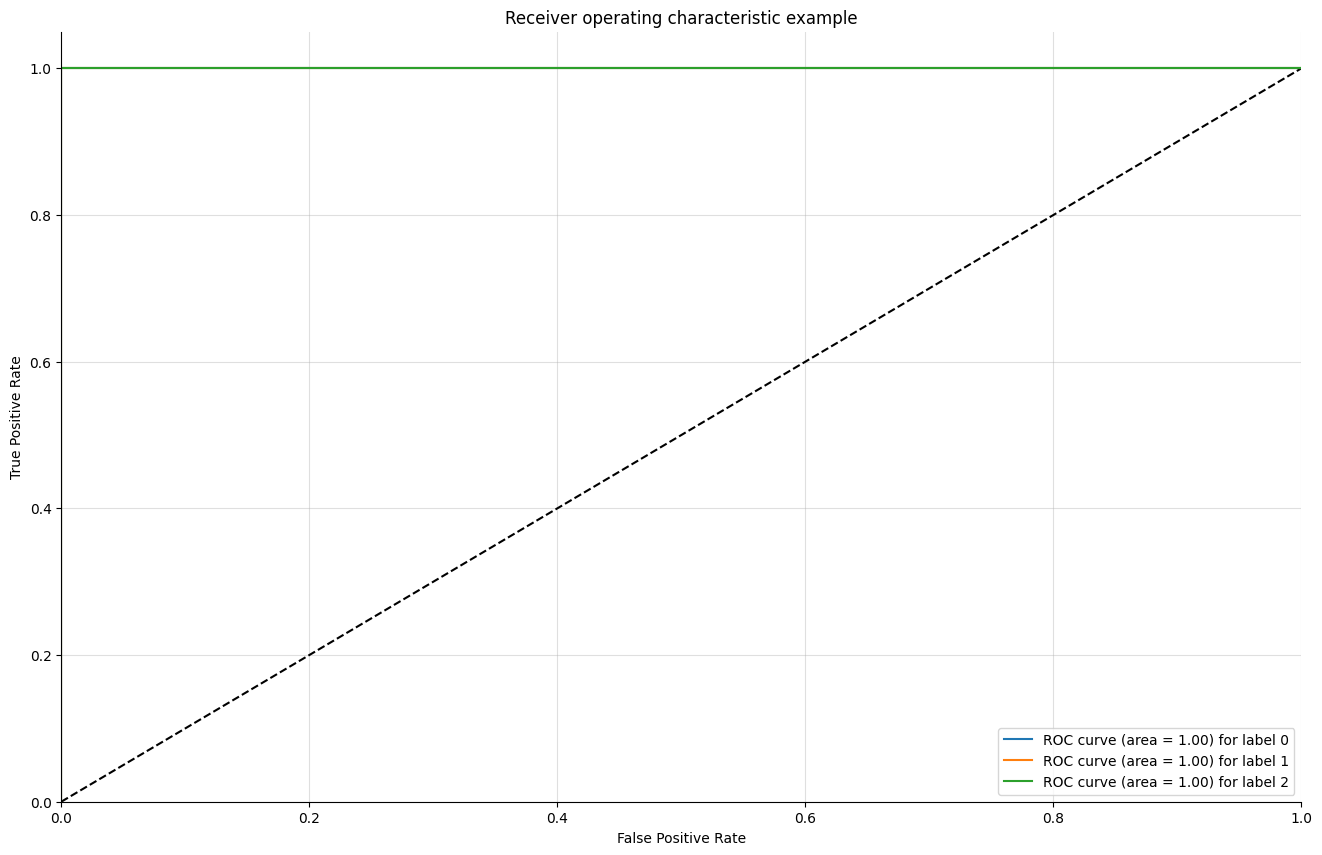

In [45]:
plot_multiclass_roc(grid_model, X_test_t, y_test, n_classes=3, figsize=(16, 10))